# Rapport final - <Titre de l'analyse>
> Mohamedlamine Amimi <mohamedlamine.amimi@supinfo.com>
> Théo Bezin <theo.bezin@supinfo.com>
> Alexis Lecomte <alexis.lecomte@supinfo.com>
> Maxence Pawlowski <maxence.pawlowski@supinfo.com>

In [318]:
# Calculs mathématiques
import math
import numpy

# Chargement et prise en charge des données
import pandas

# Prise en charge des données géographique
import geopandas
import folium
from folium import plugins

# Création de statistiques et de graphiques
import scipy.stats
import matplotlib.pyplot as pyplot
from matplotlib.ticker import NullFormatter
import plotly.express as px

# Autres
import os
import re
import time
from datetime import datetime
from tabulate import tabulate
import webbrowser
from colorama import Fore, Style

%matplotlib notebook
pyplot.style.use("ggplot")
pyplot.rcParams["figure.figsize"] = [17, 7]

## Analyse de "WashingtonPostDatabase.csv"

In [319]:
# Faute dans le nom du CSV
data_wp = pandas.read_csv("../data/WahsingtonPostDatabase.csv", parse_dates=["date"], date_parser=pandas.to_datetime)

data_wp["date"] = pandas.to_datetime(data_wp["date"]) 				# change date type to datetime
data_wp["name"] = data_wp["name"].fillna("Unknown") 				# replace NaN  by unknown
data_wp["armed"] = data_wp["armed"].fillna("Unknown") 				# replace NaN  by unknown
data_wp["gender"] = data_wp["gender"].fillna("Unknown") 			# replace NaN  by unknown
data_wp["race"] = data_wp["race"].fillna("Unknown") 				# replace NaN  by unknown
data_wp["threat_level"] = data_wp["threat_level"].fillna("Unknown")	# replace NaN  by unknown
data_wp["flee"] = data_wp["flee"].fillna("Unknown") 				# replace NaN  by unknown
data_wp["latitude"] = data_wp["latitude"].fillna("Unknown") 		# replace NaN  by unknown
data_wp["longitude"] = data_wp["longitude"].fillna(0) 				# replace NaN  by unknown
age_mean = data_wp["age"].mean()
data_wp["age"] = data_wp["age"].fillna(round(age_mean))  			# replace NaN age by mean

data_wp

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,7915,Unknown,2022-04-11,shot,gun,37.0,M,Unknown,Manitou Springs,CO,False,attack,Unknown,False,-104.917,38.858,True
7268,7916,Dwayne Jackson,2022-04-11,shot,gun,37.0,M,Unknown,Tulsa,OK,False,attack,Not fleeing,False,-95.904,36.05,True
7269,7931,Unknown,2022-04-12,shot,sharp object,37.0,M,Unknown,Edison,NJ,False,undetermined,Unknown,False,-74.331,40.548,True
7270,7929,Trevan Bonner,2022-04-13,shot,gun,18.0,M,Unknown,Lafayette,LA,False,attack,Unknown,False,-92.032,30.25,True


## Analyse de "PoliceDeaths.csv"

In [320]:
data_pd = pandas.read_csv("../data/PoliceDeaths.csv", index_col=None, parse_dates=["date"], date_parser=pandas.to_datetime)
data_pd["state"] = data_pd["state"].map(lambda state: state.strip())

pd_state_data = pandas.DataFrame(
	data=data_pd["state"].value_counts().reset_index().values,
	columns=["State", "Number of deaths"]
).sort_values("State", ascending=True)

data_pd

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC
...,...,...,...,...,...,...,...,...,...,...
22795,K9 Bruno,"Amarillo Police Department, TX","EOW: Sunday, June 12, 2016",Cause of Death: Accidental,Accidental,2016-06-12,2016,True,Amarillo Police Department,TX
22796,K9 Lazer,United States Department of Homeland Security ...,"EOW: Monday, June 20, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-20,2016,True,United States Department of Homeland Security ...,US
22797,K9 Tyson,"Fountain County Sheriff's Office, IN","EOW: Monday, June 27, 2016",Cause of Death: Heat exhaustion,Heat exhaustion,2016-06-27,2016,True,Fountain County Sheriff's Office,IN
22798,K9 Credo,"Long Beach Police Department, CA","EOW: Tuesday, June 28, 2016",Cause of Death: Gunfire (Accidental),Gunfire (Accidental),2016-06-28,2016,True,Long Beach Police Department,CA


In [321]:
data_pd.head()

,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


#### Infos

In [322]:
data_pd.shape

(22800, 10)

In [323]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   person       22800 non-null  object        
 1   dept         22800 non-null  object        
 2   eow          22800 non-null  object        
 3   cause        22800 non-null  object        
 4   cause_short  22800 non-null  object        
 5   date         22800 non-null  datetime64[ns]
 6   year         22800 non-null  int64         
 7   canine       22800 non-null  bool          
 8   dept_name    22800 non-null  object        
 9   state        22800 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(7)
memory usage: 1.6+ MB


22800 personnes en tout avec 9 informations par personne.

#### Données manquantes

In [324]:
data_pd.isna().sum()

person         0
dept           0
eow            0
cause          0
cause_short    0
date           0
year           0
canine         0
dept_name      0
state          0
dtype: int64

Il ne nous manque aucune donnée.

#### Nombre de données totales

In [325]:
nb_data = data_pd.shape[1] * data_pd.shape[0]
nb_data

228000

#### Données dupliquées

In [326]:
data_pd.duplicated().sum()

0

Nous n'avons aucunes données dupliquées

#### Moyenne, écart-type, minimum, etc

In [327]:
data_pd.describe()

,year
count,22800.000000
mean,1951.751272
std,38.233234
min,1791.000000
25%,1924.000000
50%,1952.000000
75%,1983.000000
max,2016.000000


#### Nombre de valeurs canine

In [328]:
data_pd.canine.value_counts()

False    22537
True       263
Name: canine, dtype: int64

In [329]:
data_pd.canine.value_counts(normalize=True)*100 #Transformation %

False    98.846491
True      1.153509
Name: canine, dtype: float64

In [331]:
_ = data_pd.canine.value_counts().plot(kind="pie", autopct='%1.2f%%')

<IPython.core.display.Javascript object>

#### Répartition par État

In [132]:
_ = data_pd.state.value_counts().plot(kind="pie")

L'état comprenant le plus de morts de policiers est le Texas, suivi par la Californie et l'état de New York.

#### Répartition par cause de décès

In [133]:
_ = data_pd.cause_short.value_counts().plot(kind="pie")

On peut voir que la cause de mort principale sont les armes à feu, ensuite les accidents de voiture.

### Impact de la localisation (par état et par emplacement)

In [134]:
data_pd['state'].value_counts()

TX    1880
CA    1639
NY    1574
US    1225
IL    1073
PA     901
OH     834
FL     820
KY     772
GA     698
MO     666
TN     607
MI     574
NC     549
AL     537
VA     523
OK     496
NJ     485
LA     470
IN     434
PR     363
SC     362
MA     360
MD     325
CO     305
WA     290
AR     284
RR     280
WI     275
AZ     273
MS     261
KS     257
MN     244
WV     208
IA     197
OR     182
NM     151
CT     144
DC     128
UT     128
MT     128
NV     120
NE     110
ME      86
ID      64
WY      57
HI      56
ND      55
SD      53
TR      51
RI      50
AK      48
NH      46
DE      41
VT      26
VI      14
GU      12
CZ       3
AS       3
MP       3
Name: state, dtype: int64

In [135]:
pd_state_data

,State,Number of deaths
51,AK,48
14,AL,537
26,AR,284
58,AS,3
29,AZ,273
1,CA,1639
24,CO,305
37,CT,144
57,CZ,3
38,DC,128


In [136]:
# fig = px.choropleth(pd_state_data,
#                    locations='State',
#                    color='Number of deaths',
#                    color_continuous_scale='spectral_r',
#                    locationmode='USA-states',
#                    labels={'Nombre de morts':'number_of_deaths'},
#                    scope='usa', title="Nombre de morts totales de policiers par état aux États-Unis")
# fig.show()

On observe sur cette carte la répartition géographique du nombre de morts de policiers selon l'état. On ne peut pas vraiment conclure d'une corrélation entre la situation géographique d'un état et son nombre de policiers tués en service.

In [137]:
# fig = px.bar(pd_state_data, x='State', y='Number of deaths', text_auto='.2s',title="Nombre de morts totales de policiers par état aux États-Unis")
# fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
# fig.show()

L'état du Texas est l'état qui comporte le plus de morts de policiers totales au cours de ce siècle dernier avec plus de 1900 décès totaux.

### Etude par an

In [138]:
data_pd['year'].value_counts()

1930    323
1927    305
1932    301
1931    296
1924    289
       ... 
1824      1
1827      1
1828      1
1830      1
1792      1
Name: year, Length: 202, dtype: int64

In [139]:
year_data = data_pd['year'].value_counts().rename_axis('year').reset_index(name='number_of_deaths').sort_values(by='year')

In [140]:
year_data

,year,number_of_deaths
181,1791,2
201,1792,1
186,1794,1
187,1797,1
188,1804,1
...,...,...
67,2012,157
85,2013,141
62,2014,165
68,2015,157


In [141]:
# fig = px.bar(year_data, x='year', y='number_of_deaths', text_auto='.2s',title="Nombre de morts totales de policiers au cours du siècle dernier")
# fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
# fig.show()

On remarque que l'année 1930 a été la plus meurtrière pour les policiers aux États-Unis avec 323 morts de policiers pendant leur service. Cela peut s'expliquer par la surcharge de travail de la police d'État à cette époque. D'après un rapport de la police de New Jersey, "Dans les années 1930, il n'était pas rare que les policiers travaillent de douze à seize heures par jour, sans jour de repos, parfois plusieurs semaines d'affilée, pour accomplir leur mission de protection et de service." https://nj.gov/njsp/about/history/1930s.shtml

In [142]:
statebyyear_data = (data_pd['state'].where(data_pd['year'] == 1930)).value_counts()

In [143]:
statebyyear_data

NY    37
IL    27
US    21
TX    18
OK    17
MI    15
PA    11
CA    11
NJ    10
TN     9
RR     9
VA     9
MA     8
MO     8
KY     7
OH     7
FL     7
IA     7
IN     6
NC     6
GA     6
KS     6
WI     6
MN     5
LA     4
WA     4
AL     4
WV     3
ME     3
OR     3
PR     3
AR     3
NE     3
CT     3
CO     2
RI     2
NM     2
DC     2
MS     2
ND     2
MD     1
AZ     1
HI     1
SC     1
MT     1
Name: state, dtype: int64

On peut observer que cette année-là, en 1930, c'est l'état de New York qui présente le plus de morts de policiers.

In [144]:
y_causes = pandas.DataFrame()
ny_causes = data_pd['cause_short'][(data_pd.year == 1930) & (data_pd.state.str.contains('NY'))].value_counts()
ny_causes= ny_causes.rename_axis('cause').reset_index(name='number_of_deaths')

In [145]:
ny_causes

,cause,number_of_deaths
0,Gunfire,11
1,Motorcycle accident,9
2,Automobile accident,5
3,Struck by vehicle,4
4,Heart attack,2
5,Gunfire (Accidental),1
6,Stabbed,1
7,Vehicular assault,1
8,Fall,1
9,Electrocuted,1


In [146]:
# fig = px.bar(ny_causes, x='cause', y='number_of_deaths', text_auto='.2s',title="Causes de mort de policier dans l'état de New York en 1930")
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
# fig.show()

La plupart de ces morts sont dues à des armes à feu, ce sont donc des policiers tombés lors de leur service durant des fusillades ou attaques à armes à feu.

### Etude des modalités des incidents

In [147]:
causes_data = data_pd['cause_short'].value_counts()
causes_data = causes_data.rename_axis('cause').reset_index(name='number_of_deaths')

In [148]:
causes_data

,cause,number_of_deaths
0,Gunfire,12067
1,Automobile accident,2348
2,Motorcycle accident,1134
3,Heart attack,977
4,Vehicular assault,888
5,Struck by vehicle,868
6,Vehicle pursuit,627
7,Assault,613
8,Gunfire (Accidental),604
9,Stabbed,465


In [149]:
# fig = px.bar(causes_data, x='cause', y='number_of_deaths', text_auto='.2s',title="Causes de mort de policier pendant leur service")
# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
# fig.show()

## Analyse de "FatalEncounters.csv"

In [150]:
data_fe = pandas.read_csv("../data/FatalEncounters.csv", dtype={
	"Unique ID": float,
	"Name": str,
	"Age": str,
	"Gender": "category",
	"Race": "category",
	"Race with imputations": "category",
	"URL of image (PLS NO HOTLINKS)": str,
	"Location of injury (address)": str,
	"Location of death (city)": str,
	"State": str,
	"Location of death (zip code)": str,
	"Location of death (country)": str,
	"Full Address": str,
	"Latitude": str,
	"Longitude": float,
	"Agency or agencies involved": str,
	"Highest level of force": "category",
	"UID Temporary": str,
	"Name Temporary": str,
	"Armed/Unarmed": str,
	"Alleged weapon": str,
	"Aggressive physical movement": str,
	"Fleeing/Not fleeing": str,
	"Description Temp": str,
	"URL Temp": str,
	"Brief description": str,
	"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS": object,
	"Intended use of force (Developing)": str,
	"Supporting document link": str,
	"Foreknowledge of mental illness? INTERNAL USE, NOT FOR ANALYSIS": object,
	"Unnamed: 32": float,
	"Unnamed: 33": float,
	"Unique ID formula": float,
	"Unique identifier (redundant)": float
}, parse_dates=[" Date of injury resulting in death (month/day/year)"], date_parser=pandas.to_datetime)

print((
	"Total percent of missing values: "
	f"{Fore.LIGHTGREEN_EX}{round(((data_fe.isna().sum().sum() / (data_fe.shape[0] * data_fe.shape[1])) * 100), 2)}%{Fore.RESET}"
))

percent_missing = round((data_fe.isna().sum() * 100) / len(data_fe), 2)
df_missing = pandas.DataFrame({"Column name": data_fe.columns, "Missing": percent_missing.values})
df_missing.sort_values("Missing", ascending=False, inplace=True)

print((
	f"Percent of missing values per columns:\n"
	f"{Style.DIM}{Fore.WHITE}{tabulate(df_missing, showindex=False, headers=df_missing.columns)}{Style.RESET_ALL}"
))

# Drop all columns with more than `drop_threshold`% of missing data
drop_threshold = 50
drop_columns = df_missing[df_missing["Missing"] >= drop_threshold]["Column name"].tolist()

if len(drop_columns) > 0:
	print((
		f"{Fore.YELLOW}Dropping all columns with more than {drop_threshold}% of missing data. Dropping "
		f"{drop_columns}...{Fore.RESET}"
	))
	drop_prev_shape = data_fe.shape
	data_fe.drop(columns=drop_columns, axis=1, inplace=True)
	drop_new_shape = data_fe.shape
	drop_count = drop_prev_shape[1] - drop_new_shape[1]
	print(f"{Fore.YELLOW}Dropped {drop_count} column{'s' if drop_count > 1 else ''}. New shape: {drop_new_shape}{Fore.RESET}")

data_fe.drop(list(data_fe.filter(regex="INTERNAL USE, NOT FOR ANALYSIS")), axis=1, inplace=True)


def _transform_age(age):
	if isinstance(age, str):
		if "-" in age and not age.startswith("-"):
			age_range = age.split("-")
			return round(float((int(age_range[0]) + int(age_range[1])) / 2), 0)
		else:
			return round(float(age), 0)

	return round(age, 0)


data_fe["Age"] = data_fe["Age"].map(lambda age: _transform_age(age))

wrong_latitude_index = []


def _transform_latitude(lat):
	if isinstance(lat, str):
		try:
			return float(lat)
		except ValueError:
			wrong_latitude_index.append(data_fe.index[data_fe["Latitude"] == lat])
			return lat

	return lat


data_fe["Latitude"] = data_fe["Latitude"].map(lambda lat: _transform_latitude(lat))
data_fe.drop([index for sublist in wrong_latitude_index for index in sublist], inplace=True)
data_fe = data_fe.astype({"Latitude": float})


race_uncertain = "Race unspecified"
data_fe["Race"].fillna(race_uncertain, inplace=True)
data_fe["Race"] = data_fe["Race"].map(lambda race: race.title())
data_fe.loc[(data_fe["Race"] == "Christopher Anthony Alexander"), "Race"] = race_uncertain
data_fe = pandas.concat([
	data_fe.drop("Race", axis=1),
	data_fe["Race"].str.get_dummies(sep="/").add_prefix("Race_")
], axis=1)


armed_uncertain = "Uncertain"


def _transform_is_armed(is_armed):
	if isinstance(is_armed, str):
		if (is_armed.lower() == "armed") or (is_armed.lower() == "unarmed"):
			return is_armed
		elif re.match(r"duplicate|none", is_armed, flags=re.IGNORECASE):
			return armed_uncertain
		else:
			return armed_uncertain
	else:
		return armed_uncertain


data_fe["Armed/Unarmed"] = data_fe["Armed/Unarmed"].map(lambda is_armed: _transform_is_armed(is_armed))
data_fe = data_fe.astype({"Armed/Unarmed": "category"})


fleeing_uncertain = "Uncertain"


def _transform_is_fleeing(is_fleeing):
	if isinstance(is_fleeing, str):
		if re.match(r"duplicate|none", is_fleeing, flags=re.IGNORECASE):
			return fleeing_uncertain
		else:
			parts = is_fleeing.lower().split("/")

			if "fleeing" in parts:
				return "Fleeing"
			elif "not fleeing" in parts:
				return "Not fleeing"
			elif fleeing_uncertain.lower() in parts:
				return fleeing_uncertain
			else:
				return fleeing_uncertain
	else:
		return fleeing_uncertain


data_fe["Fleeing/Not fleeing"] = data_fe["Fleeing/Not fleeing"].map(lambda is_fleeing: _transform_is_fleeing(is_fleeing))
data_fe = data_fe.astype({"Fleeing/Not fleeing": "category"})

data_fe.rename({" Date of injury resulting in death (month/day/year)": "Date of death"}, axis=1, inplace=True)

Total percent of missing values: 24.75%
Percent of missing values per columns:
Column name                                                        Missing
---------------------------------------------------------------  ---------
Unnamed: 33                                                         100
Unnamed: 32                                                         100
Unique ID formula                                                    99.99
URL Temp                                                             89.79
Description Temp                                                     87.09
UID Temporary                                                        82.45
Name Temporary                                                       82.45
URL of image (PLS NO HOTLINKS)                                       53.24
Armed/Unarmed                                                        45.78
Fleeing/Not fleeing                                                  45.78
Alleged weapon             

## Analyse de "TaxPolicyCenter.xls"

### Mise en forme de départ
Le fichier Excel nécessite un traitement de départ pour pouvoir exploiter les données.
Pour quelques-uns de nos calculs, nous utiliserons la feuille '2019' qui contient les données les plus récentes.

In [151]:
tax_data = pandas.read_excel(
    "../data/TaxPolicyCenter.xls",
    skiprows=5, skipfooter=4, # On ne prend pas en compte les lignes informatiques du header et du footer
    header=[0,1,2], # Les noms des colonnes sont sur trois lignes, nous traiterons donc ces lignes comme une seule ligne
    sheet_name=None
)
tax_sample = tax_data["2019"]

La boucle réalisera des traitements sur chaque feuille du fichier.
D'abord, nous renommons les colonnes (puisque le header se compose de trois lignes) pour obtenir des noms cohérents.
Nous récupérons également quelques données qui seront utilisées plus tard pour les graphiques et certains calculs.

In [152]:
tax_total_data = 0
total_income_list = []
police_budget = []
budget_years = []
print("===================Data INFO=====================")
tax_sample.info() #71 états/collectivités avec 11 colonnes de dépenses
for sheet in tax_data :
    income = 0
    df = tax_data[sheet]
    df.columns = ["_".join(index_str) for index_str in df.columns.to_flat_index()]
    df.rename(columns={
        "Unnamed: 0_level_0_Region and State_Unnamed: 0_level_2": "Region and State","Unnamed: 1_level_0_Region and State_Total": "Total",
        "Unnamed: 2_level_0_Inter-_governmental": "Inter-governmental",
        "Unnamed: 3_level_0_Inter-_Total": "Direct Total",
        "Elementary_and Secondary_Education": "Elementary and Secondary Education",
        "Elementary_Higher_Education": "Higher Education",
        "Elementary_Public_Welfare": "Public Welfare",
        "Elementary_Health and_Hospitals": "Health and Hospitals",
        "Elementary_Health and_Highways": "Highways",
        "Elementary_Health and_Police": "Police",
        "Elementary_All_Other": "All Other",
        "Personal_Income [1]_(Millions)": "Personal Income [1] (Millions)"
    }, inplace=True)
    print("===================Données manquantes pour " + sheet + " ?=====================")
    print(df.isna().sum()) # On vérifie si des valeurs sont manquantes
    df.dropna(inplace=True) # Suppression des lignes avec une valeur manquantes
    tax_total_data += df.shape[1]*df.shape[0] # On ajoute le total des données de la feuille dans une variable
    total_income_list.insert(0,(df.iloc[0]['Personal Income [1] (Millions)'])) # On ajoute
    police_budget.insert(0,(df.iloc[0]['Personal Income [1] (Millions)'])/100*(df.iloc[0]['Police']*100))
    budget_years.insert(0, sheet)
tax_sample["All years income"] = pandas.Series(total_income_list)
tax_sample["Police budget evolution"] = pandas.Series(police_budget)

===================Data INFO=====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   (Unnamed: 0_level_0, Region and State, Unnamed: 0_level_2)  60 non-null     object 
 1   (Unnamed: 1_level_0, Region and State, Total)               60 non-null     float64
 2   (Unnamed: 2_level_0, Inter-, governmental)                  60 non-null     float64
 3   (Unnamed: 3_level_0, Inter-, Total)                         60 non-null     float64
 4   (Elementary, and Secondary, Education)                      60 non-null     float64
 5   (Elementary, Higher, Education)                             60 non-null     float64
 6   (Elementary, Public, Welfare)                               60 non-null     float64
 7   (Elementary, Health and, Hospitals)      

In [153]:
print("===================Total des données=====================")
print(tax_total_data)

===================Total des données=====================
11520


Nous affichons des statistiques sur toutes les colonnes. Celles qui nous intéressent le plus sont les colonnes Police, All years income et Police budget evolution.

In [154]:
print("===================Description et stats=====================")
print(tax_sample.describe())

===================Description et stats=====================
           Total  Inter-governmental  Direct Total  \
count  60.000000           60.000000     60.000000   
mean   18.281756            0.007065     18.274691   
std     3.785900            0.020820      3.783119   
min     0.180093            0.000000      0.179921   
25%    16.517344            0.000000     16.517344   
50%    18.147631            0.000018     18.147577   
75%    19.794667            0.001935     19.794667   
max    28.095157            0.108886     28.095157   

       Elementary and Secondary Education  Higher Education  Public Welfare  \
count                           60.000000         60.000000       60.000000   
mean                             3.867793          1.767521        4.031424   
std                              0.797018          0.613697        1.352895   
min                              0.038711          0.016792        0.040109   
25%                              3.579619          1.2802

Bien que les statistiques précédentes nous montrent une moyenne, une médiane et d'autres informations, nous les affichons tout de même ici sous une forme plus lisible.

In [155]:
print("===================Moyenne=====================")
print("All years income :", tax_sample["All years income"].mean())
print("Police budget :", tax_sample["Police budget evolution"].mean())

===================Moyenne=====================
All years income : 14335731.153846154
Police budget : 99998.42100129538


In [156]:
print("===================Médiane=====================")
print("All years income :", tax_sample["All years income"].median())
print("Police budget :", tax_sample["Police budget evolution"].median())

===================Médiane=====================
All years income : 13998383.0
Police budget : 96875.94953533


In [157]:
print("===================Skew=====================")
print("All years income :", tax_sample["All years income"].skew())
print("Police budget :", tax_sample["Police budget evolution"].skew())

===================Skew=====================
All years income : 0.3442130183886384
Police budget : -0.025606281986510004


Pour les graphiques nous avons choisi un graphique de courbe, car il est le plus explicite concernant les données sur une période en années.
C'est ici que nous utilisons les listes contenant les valeurs récupérées lors de la boucle.

#### Évolution du revenu intérieur des USA

<IPython.core.display.Javascript object>


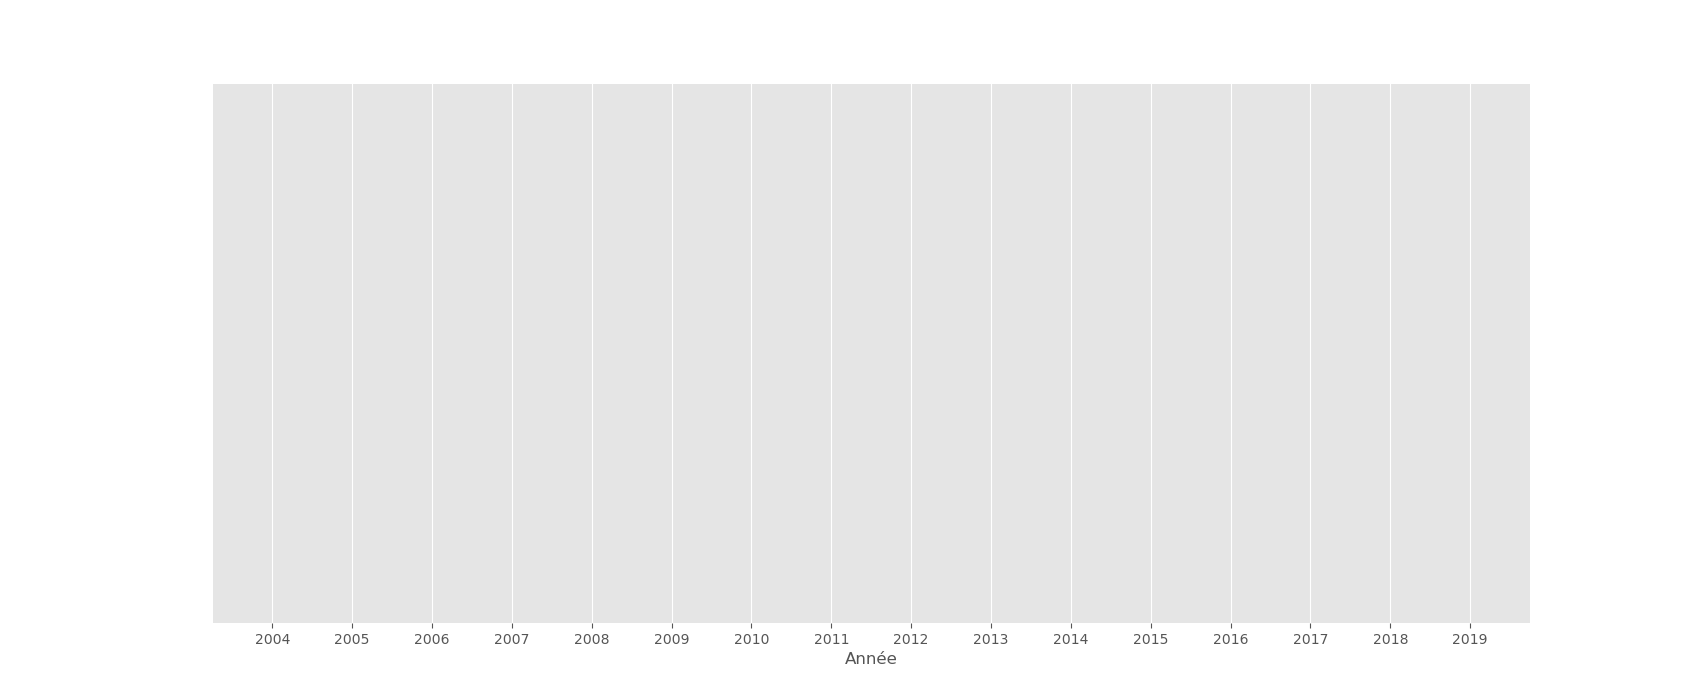

In [166]:
def formatter_1e6(x): # Pour l'affichage simplifié de l'axe Y
    return str(round(x / 1e6, 1))

ti_fig = pyplot.figure()
ti_ax = ti_fig.add_subplot(111)

ti_ax.plot(numpy.array(budget_years), numpy.array(total_income_list))

ti_ax.yaxis.set_major_formatter(formatter_1e6)
ti_ax.yaxis.set_minor_formatter(NullFormatter)
ti_ax.set_xlabel("Année")
ti_ax.set_ylabel("Budget")
ti_ax.text(0, 1.05, "en millions ($)", transform=pyplot.gca().transAxes, ha="left", va="top")

ti_ax.set_title("Évolution du revenu intérieur des USA")
pyplot.show()

#### Évolution du budget de la police aux USA

In [159]:
"""
def formatter_1e4(x): # Pour l'affichage simplifié de l'axe Y
    return str(round(x / 1e4, 1))

pyplot.plot(numpy.array(budget_years), numpy.array(police_budget))
pyplot.gca().get_yaxis().set_major_formatter(formatter_1e4)
pyplot.gca().get_yaxis().set_minor_formatter(NullFormatter)
pyplot.title("Évolution du budget de la police aux USA")
pyplot.xlabel("Année")
pyplot.ylabel("Budget")
pyplot.gca().text(0, 1.05, "en dizaines de milliers ($)", transform=pyplot.gca().transAxes, ha="left", va="top")
pyplot.show()
"""

'\ndef formatter_1e4(x): # Pour l\'affichage simplifié de l\'axe Y\n    return str(round(x / 1e4, 1))\n\npyplot.plot(numpy.array(budget_years), numpy.array(police_budget))\npyplot.gca().get_yaxis().set_major_formatter(formatter_1e4)\npyplot.gca().get_yaxis().set_minor_formatter(NullFormatter)\npyplot.title("Évolution du budget de la police aux USA")\npyplot.xlabel("Année")\npyplot.ylabel("Budget")\npyplot.gca().text(0, 1.05, "en dizaines de milliers ($)", transform=pyplot.gca().transAxes, ha="left", va="top")\npyplot.show()\n'

## Analyse géographique des données

### Carte

In [160]:
class Map:
	TILE_LAYERS = [
		{"name": "openstreetmap", "display_name": "Open Street Map"},
		{"name": "stamentoner", "display_name": "Stamen toner"},
		{"name": "cartodbpositron", "display_name": "CartoDB (Light)"},
		{"name": "cartodbdark_matter", "display_name": "CartoDB (Dark)"},
	]

	def __init__(self, crs="EPSG:3857", **kwargs):
		self.crs = crs
		self.map = folium.Map(tiles=None, crs=self.crs.replace(":", ""), **kwargs)
		self.layers = []

	def _add_tile_layers(self):
		for layer in Map.TILE_LAYERS:
			folium.TileLayer(layer["name"], name=layer["display_name"]).add_to(self.map)

	def _add_map_layers(self):
		for layer in self.layers:
			for sublayer in layer.get_layers():
				sublayer.add_to(self.map)

	def _register_layer(self, layer):
		if isinstance(layer, MapLayer):
			self.layers.append(layer)

	def fit_bounds(self, south_west, north_east):
		self.map.fit_bounds([south_west, north_east])

	def open(self, notebook=False, output_dir="./temp", filename=None):
		self._add_tile_layers()
		self._add_map_layers()
		folium.LayerControl().add_to(self.map)

		if notebook:
			return self.map

		path = os.path.join(output_dir, (filename if filename else f"map-{time.time()}.html"))

		self.map.save(path)
		webbrowser.open(path)

### Couche de carte

In [161]:
class MapLayer:
	DATA_TYPES = {"DataFrame": 0, "Geo[GCS]": 1, "TimedGeo[GCS]": 1}

	def __init__(self, name, show_default=False):
		self.name = name
		self.parent_map = None
		self.feature_group = folium.FeatureGroup(self.name, overlay=True, show=show_default)
		self.layers = []

		self.data = None
		self.data_type = False

	def get_layers(self):
		return self.layers

	def add_to(self, m):
		if isinstance(m, Map):
			self.parent_map = m
			# noinspection PyProtectedMember
			self.parent_map._register_layer(self)

		return self

	def load_dataframe(self, data):
		self.data = data
		self.data_type = MapLayer.DATA_TYPES["DataFrame"]

		return self

	def load_gcs_data(self, data, col_names=None, time_column=None):
		if time_column is None:
			col_names = col_names if col_names else {"lat": "Latitude", "lon": "Longitude"}
			data_coords = data[[col_names["lat"], col_names["lon"]]].dropna(axis=0, how="any")
			geometry = geopandas.points_from_xy(data_coords[col_names["lon"]], data_coords[col_names["lat"]])

			self.data = geopandas.GeoDataFrame(data, geometry=geometry, crs=self.parent_map.crs)
			self.data_type = MapLayer.DATA_TYPES["Geo[GCS]"]
		else:
			data_coords = data[[time_column, col_names["lat"], col_names["lon"]]].dropna(axis=0, how="any")
			data_dates = data[time_column].drop_duplicates()
			data_timed = {}

			for _, d in data_dates.iteritems():
				data_timed[d.date().__str__()] = data_coords.loc[data_coords[time_column] == d][[col_names["lat"], col_names["lon"]]].values.tolist()

			self.data = data_timed
			self.data_type = MapLayer.DATA_TYPES["TimedGeo[GCS]"]

		return self

	def _add_to_layer(self, item):
		item.add_to(self.feature_group)
		self.layers.append(item)

	def to_heatmap(self, **kwargs):
		if not self.data_type == MapLayer.DATA_TYPES["Geo[GCS]"]:
			raise RuntimeError("MapLayer: to_heatmap() is only available for GCS data.")

		heat_data = [[point.xy[1][0], point.xy[0][0]] for point in self.data.geometry if not point.is_empty]
		heat_map = folium.plugins.HeatMap(heat_data, name=self.name, **kwargs)
		self._add_to_layer(heat_map)

		return self

	def to_timed_heatmap(self, **kwargs):
		if not self.data_type == MapLayer.DATA_TYPES["TimedGeo[GCS]"]:
			raise RuntimeError("MapLayer: to_timed_heatmap() is only available for timed GCS data.")

		heat_map = folium.plugins.HeatMapWithTime(list(self.data.values()), index=list(self.data.keys()), name=self.name, **kwargs)
		self._add_to_layer(heat_map)

	def to_choropleth(self, key_on=None, fill_color=None, **kwargs):
		if not self.data_type == MapLayer.DATA_TYPES["DataFrame"]:
			raise RuntimeError("MapLayer: to_choropleth() is only available for pandas dataframes.")

		choropleth = folium.Choropleth(
			data=self.data,
			key_on=(key_on if key_on else "feature.id"),
			fill_color=(fill_color if fill_color else "YlOrRd"),
			**kwargs
		)
		self._add_to_layer(choropleth)

		return self

### Création de la carte

In [162]:
data_wp_geo = data_wp.loc[data_wp["is_geocoding_exact"]]
data_fe_geo = data_fe.loc[data_fe["Date of death"] >= datetime(2015, 1, 2)]

In [163]:
plot_map = Map()

encounter_layer = MapLayer("Fatal encounters", show_default=True)
encounter_layer.add_to(plot_map).load_gcs_data(data_fe, col_names={"lat": "Latitude", "lon": "Longitude"}, time_column="Date of death").to_timed_heatmap(
	min_opacity=0.4, radius=20
)

police_death_layer = MapLayer("Police Deaths", show_default=False)
police_death_layer.add_to(plot_map).load_dataframe(pd_state_data).to_choropleth(
	geo_data="https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/us-states.json",
	columns=["State", "Number of deaths"],
	name="Police deaths",
	legend_name="Police deaths",
	key_on="feature.id",
	fill_color="YlOrRd",
	fill_opacity=0.7,
	line_opacity=0.2
)

plot_map.open(notebook=True)